0.9320564094711127


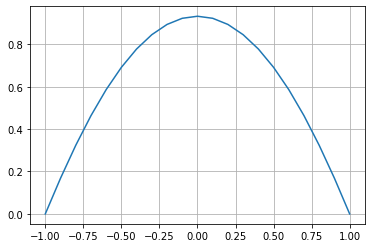

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.integrate import quad
from functools import reduce


def define_base_system(n):
    def generate_function(power):
        def f(x):
            return x ** power * (1 - x ** 2)
        return f

    return [generate_function(i) for i in range(n)]


def discrete_mnk(func_coeff, base_system, x_vector):
    n = len(base_system)
    A = np.zeros((n, n))
    b = np.zeros(n)
    
    coeff = np.empty((n, n))
    for i, f in enumerate(base_system):
        for j, x in enumerate(x_vector):
            coeff[i][j] = (
                func_coeff[0](x) * derivative(func=f, x0=x, dx=1e-3, n=2) +
                func_coeff[1](x) * derivative(func=f, x0=x, dx=1e-3, n=1) +
                func_coeff[2](x) * f(x)
            )
    
    for i in range(n):
        for j in range(n):
            for k in range(n):
                A[i][j] += coeff[j][k] * coeff[i][k]

        for k, x in enumerate(x_vector):
            b[i] += func_coeff[3](x) * coeff[i][k]
    return np.linalg.solve(A, b)


def r(x):
    return 1


def p(x):
    return 0


def q(x):
    return 1 + x ** 2


def f(x):
    return -1


n = 100
xa, xb = -1, 1
h = (xb - xa) / (n + 1)
x_vector = [xa + i * h for i in range(1, n + 1)]
func_coeff = (r, p, q, f)
base_system = define_base_system(n)
coeff = discrete_mnk(func_coeff, base_system, x_vector)

h = 0.1
x_vector = np.arange(xa, xb + h, h)
y_vector = np.array([reduce(
                        lambda prev_el, next_el: prev_el + next_el[0] * next_el[1](x),
                        zip(coeff, base_system),
                        0,
                     ) for x in x_vector])
print(max(y_vector))
plt.plot(x_vector, y_vector)
plt.grid()
plt.show()